In [3]:
import os
import re
import pandas as pd

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_json(os.path.join("data","cnb_ceska_proza.json"))

In [6]:
df = df.transpose()

In [7]:
df

,rok,titul,autorstvo,autorstvo_kod
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522
...,...,...,...,...
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967
nkc20243601266,2024.0,Isabela a červené šípky,Peroutková Ivana,jn20000401963
nkc20243601317,2024.0,Povídky z Kopanic,Hofer Josef,jk01041489


In [8]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [9]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [10]:
df

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,None,None,[1744],[1812],[jk01103049],"[Rulík, Jan,]",[1744-1812],[1],None,"[Žleby, Česko]","[Praha, Česko]",[Česko],None,"[próza, poezie, překladatelství, hudba, osvíce...",None,"[prozaici, básníci, překladatelé, editoři, spi...",[muž],"[cze, ger, lat]","[Ruljk, Jan,, Rulík, Jan Nepomuk Josef,, Rulli...","[1744-1812, 1744-1812, 1744-1812, 1744-1812, 1...",None,"[1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 20. 2. 1744 ve Žlebech (Česko), zemře...",None,cz a22 n 4500
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,"[isni, wikidata]","[000000005791711X, Q1681568]",[1751],[1806],[jk01033422],"[Hanke z Hankenštejna, Jan Alois,]",[1751-1806],[1],None,"[Holešov, Česko]","[Prostějov, Česko]",[Česko],None,"[knihovny, slavistika]","[Universitní knihovna (Olomouc, Česko)]","[knihovníci, slavisté]",[muž],[ger],"[Jan,, Jan,, <<z >>Hankenštejna, Jan Alois Han...","[1751-1806, 1751-1806, 1751-1806, 1751-1806, 1...","[Pseudonym:, Pseudonym:, None, None, None, Non...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 24. nebo 26. 5. 1751 v Holešově, zemř...",[https://cs.wikipedia.org/wiki/Jan_Alois_Hanke],cz a22 n 4500
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,"[isni, wikidata]","[0000000055267790, Q3500252]",[1772],[1844],[jk01082969],"[Nejedlý, Vojtěch,]",[1772-1844],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 17.4.1772 v Žebráku, zemřel 7.12.1844...",None,nz a22 n 4500
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,"[isni, wikidata]","[0000000109474219, Q608517]",[1691],[1760],[jk01061522],"[Koniáš, Antonín,]",[1691-1760],[1],None,"[Praha, Česko]","[Praha, Česko]","[Česko, Polsko]","[Kutná Hora, Česko, Hradec Králové, Česko, Sta...","[teologie, homiletika, misijní činnost, cenzur...",[Jezuité],"[teologové, kazatelé, misionáři, cenzoři, přek...",[muž],"[cze, lat]","[Koňas z Vydří,, Konyáš, Antonín,, Koňas z Vyd...","[1691-1760, 1691-1760, 1691-1760, 1691-1760, 1...",None,"[0, 1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 13. 2. 1691 v Praze, zemřel 27. 10. 1...",[https://cs.wikipedia.org/wiki/Anton%C3%ADn_Ko...,cz a22 n 4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587,None,None,[1971],None,[ola2003165587],"[Nejedlý, Jan,]",[1971-],[1],None,"[Praha, Česko]",None,[Česko],None,"[školství, literatura, žurnalistika, redakční ...",None,"[pedagogové, spisovatelé, básníci, novináři, r...",[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 19. 3. 1971 v Praze. Pedagog, spisova...",None,cz a22 n 4500
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967,"[isni, wikidata]","[0000000058292561, Q95155488]",[1976],None,[ola2003204967],"[Hegerová, Vendula,]",[1976-],[1],None,"[Vysoké Mýto, Česko]",None,[Česko],"[Vysoké Mýto, Česko]","[ilustrace, literatura pro děti a mládež, design]",None,"[ilustrátorky, designérky]",[žena],None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 23. 3. 1976 ve Vysokém Mýtě. Ilustrá...,None,cz a22 n 4500
nkc20243601266,2024.0,Isabela a č

In [11]:
def letopocet(x):
    if (x != "None") and (x != "nan") and (x != None):
        try:
            return int(re.search(r'\d{4}',x).group(0))
        except Exception as e:
            print(x)
            print(e)
            return None
    else:
        return None

In [12]:
df['narozeni'] = df['046_f'].astype(str).apply(lambda x: letopocet(x))

In [13]:
df['umrti'] = df['046_g'].astype(str).apply(lambda x: letopocet(x))

In [14]:
df['vek'] = df['rok'] - df['narozeni']

In [15]:
df.sample(20)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek
nkc20203219885,1940.0,Stopa vede na západ,Klimánek Václav,jk01060553,None,None,[1892],None,[jk01060553],"[Klimánek, Václav,]",[1892-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 18.10.1892 v Praze. Malíř, ilustrátor...",None,nz a22 n 4500,1892.0,NaN,48.0
nkc20142597118,2014.0,Jezevec Chrujda točí film,Stančík Petr,jo2008411895,None,None,[1968],None,[jo2008411895],"[Stančík, Petr,]",[1968-],[1],None,"[Rychnov nad Kněžnou, Česko]",None,[Česko],None,"[literatura, reklama a propagace, medievalisti...",None,"[spisovatelé, básníci, dramatici, reklamní pra...",[muž],[cze],None,None,None,None,None,None,None,None,"[Pečírka, Stanislav,, Stradický ze Strdic, Odi...","[Pseudonym:, Pseudonym:]","[1, 1]",None,[Narozen 9. 6. 1968 v Rychnově nad Kněžnou. Sp...,[http://cs.wikipedia.org/wiki/Petr_Stan%C4%8D%...,cz a22 n 4500,1968.0,NaN,46.0
nkc20223445366,2022.0,Čas Růže,Mertlíková Věra,xx0215384,None,None,[1972],None,[xx0215384],"[Mertlíková, Věra,]",[1972-],[1],None,"[Zlín, Česko]",None,[Česko],None,"[česká literatura, fantasy literatura]",None,None,[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 1972 ve Zlíně. Administrativní praco...,None,cz a22 n 4500,1972.0,NaN,50.0
nkc20071713911,1999.0,Chvalatické povídky,Kavalec Stanislav,mzk2004148427,None,None,[1933],None,[mzk2004148427],"[Kavalec, Stanislav,]",[1933-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 30.5.1933 ve Chvalaticích na Bítovsku...,None,nz a22 n 4500,1933.0,NaN,66.0
cpk20000971160,2000.0,Život nanečisto,Nesvadbová Barbara,jn99240000759,None,None,[1975],None,[jn99240000759],"[Nesvadbová, Barbara,]",[1975-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literární činnost, próza, překladatelská činn...",None,"[spisovatelky, novinářky, redaktorky]",[žena],"[cze, ger, eng, rus]","[Nesvadbová, Bára,]",[1975-],None,[1],None,None,None,None,None,None,None,None,[Narozena 14. 1. 1975 v Praze. Spisovatelka a ...,None,cz a22 n 4500,1975.0,NaN,25.0
nkc20092023415,2009.0,Bratři obři a jiné pohádkové pověsti,Moyzesová Naďa,mzk2005306788,None,None,[1974],None,[mzk2005306788],"[Moyzesová, Naďa,]",[1974-],[1],None,"[Ostrava, Česko]",None,[Česko],None,"[grafika, publicistika, ilustrace, internetová...",None,"[redaktorky, publicistky, grafičky, ilustrátorky]",[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 28. 7. 1974 v Ostravě. MgA., redakto...",None,cz a22 n 4500,1974.0,NaN,35.0
bknkst04957,1889.0,Samohrady,Vlček Václav,jk01150131,None,None,[1839],[1908],[jk01150131],"[Vlček, Václav,]",[1839-1908],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Vlček, Vácslav,]",[1839-1908],None,[1],None,None,None,None,None,None,None,None,"[Narozen 1.9.1839 ve Střechově u Kácova, zemře...",None,nz a22 n 4500,1839.0,1908.0,50.0
nkc20152722239,2015.0,Tajemství modré kočky,Pospíšilová Jaroslava,xx0190641,None,None,[1960],None,[xx0190641],"[Pospíšilová, Jaroslava,]",[1960-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 26. 3. 1960. Mgr., učitelka, naklada...",None,nz a22 n 4500,1960.0,NaN,55.0
nkc20183049123,2018.0,Na okraji temna,Jurman Oldřich,ola2012720637,None,None,[1940],[2021],[ola2012720637],"[Jurman, Oldřich,]",[1940-2021],[1],None,None,None,[Česko],None,[literatura faktu],None,"[ekonomové, spisovatelé]",[muž],[cze],"[Jurman, Olin,]",[1940-2021],None,[1],None,None,None,None,None,None,None,None,"[Narozen 27. 6. 1940, zemřel v červenci 2021. ...",None,cz a22 n 4500,1940.0,2021.0,78.0
nkc20193124293,1925.0,Pověsti a báje z kraje Jirásk

In [16]:
def gender(x, aut):
    z = None
    if 'ová' in str(aut):
        z = 'ová'
    try:
        for y in x:
            if y == 'muž':
                z = 'm'
            if y == 'žena':
                z = 'f'
    except:
        pass
    return z

In [17]:
df['gender'] = df.apply(lambda row: gender(row['375_a'],row['autorstvo']), axis=1)

In [18]:
df[['autorstvo','375_a','gender','046_f','046_g','narozeni','umrti']].sample(20)

,autorstvo,375_a,gender,046_f,046_g,narozeni,umrti
nkc20092024911,Vítek Jan,None,None,None,None,NaN,NaN
cpk20172927054,Lesley Bill,NaN,None,NaN,NaN,NaN,NaN
bk198102045,Falteisek Lubor,None,None,[1951],None,1951.0,NaN
nkc20102151299,Kocourek Jan,None,None,None,None,NaN,NaN
nkc20193158506,Boček Petr,[muž],m,[1967],None,1967.0,NaN
nkc20172931860,Cerman Petr,None,None,None,None,NaN,NaN
cpk19960121150,Mejstřík Karel,None,None,[1902],[1994],1902.0,1994.0
nkc20152733077,Tlapák Navrátilová Jana,[žena],f,[1973],None,1973.0,NaN
nkc20203243640,Gruntová Andrea,[žena],f,[1976],None,1976.0,NaN
cpk19990326565,Pecháčková Ivana,[žena],f,[1958],None,1958.0,NaN


<Axes: xlabel='rok'>

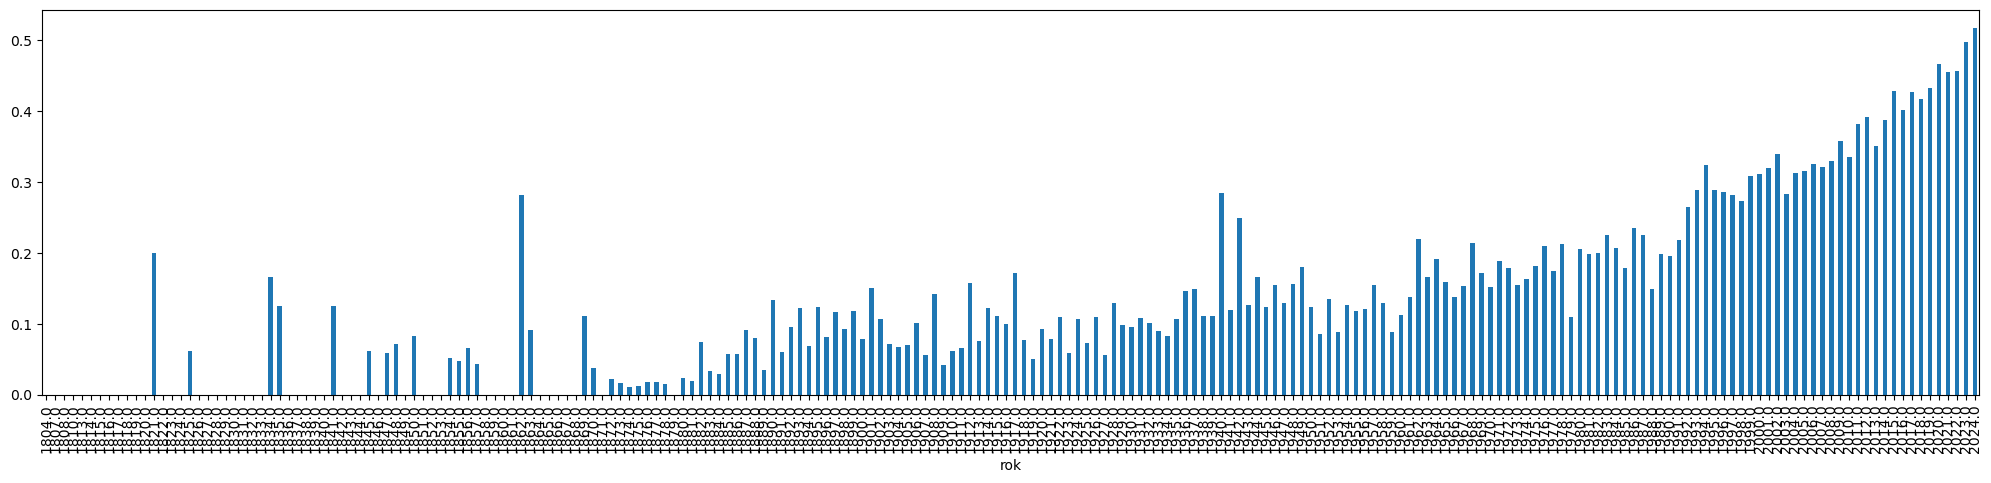

In [19]:
(df[df['gender'].isin(['ová','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [69]:
df.groupby('rok').size()

rok
1804.0       2
1807.0       2
1808.0       1
1810.0       2
1813.0       3
1814.0       5
1815.0       2
1816.0       3
1817.0       3
1818.0       2
1819.0       6
1820.0       4
1821.0       5
1822.0       3
1823.0       6
1824.0      12
1825.0      16
1826.0       3
1827.0       1
1828.0       3
1829.0       4
1830.0       8
1831.0       6
1832.0       2
1833.0       1
1834.0       6
1835.0       8
1836.0       5
1837.0       5
1838.0       6
1839.0       1
1840.0       4
1841.0       8
1842.0       6
1843.0      14
1844.0      31
1845.0      16
1846.0      13
1847.0      17
1848.0      14
1849.0      16
1850.0      12
1851.0      10
1852.0      18
1853.0      15
1854.0      19
1855.0      21
1856.0      15
1857.0      23
1858.0      26
1859.0      19
1860.0      21
1861.0      29
1862.0      32
1863.0      33
1864.0      23
1865.0      25
1866.0      17
1867.0      17
1868.0      22
1869.0      27
1870.0      26
1871.0      34
1872.0      45
1873.0      57
1874.0      87
1875.0

<Axes: xlabel='rok'>

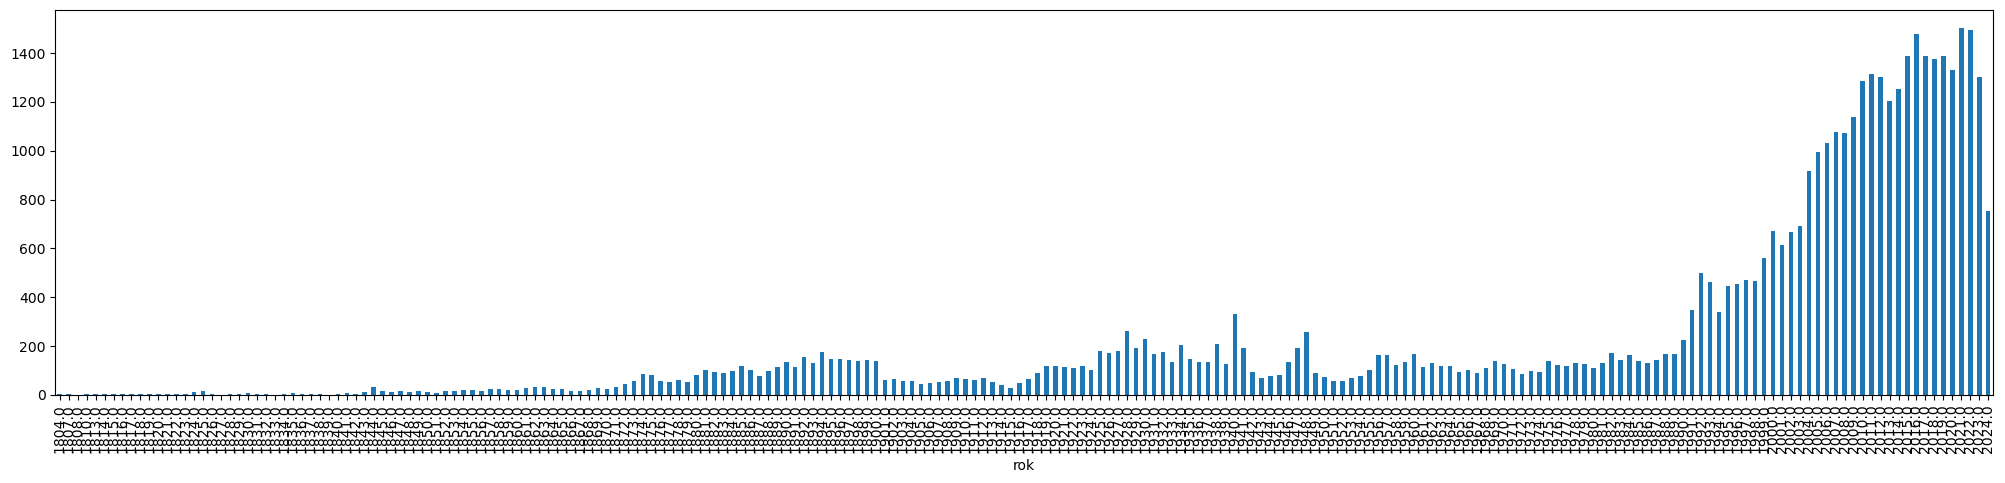

In [20]:
df.groupby('rok').size().plot.bar(figsize=(25,5))

In [73]:
df[(df['rok'] == 1967) & ((df['umrti'] > df['rok']) | df['umrti'].isnull())]

C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
bk196700753,1967.0,O strachu osamělých stromů,Postler Miroslav,jk01100752,None,None,[1929],None,[jk01100752],"[Postler, Miroslav,]",[1929-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 25.5.1929 v Českých Budějovicích. Kni...,None,nz a22 n 4500,1929.0,NaN,38.0,None
bk196803988,1967.0,Dívka z Černé věže,Slabý Zdeněk Karel,jk01111713,None,None,[1930],[2020],[jk01111713],"[Slabý, Zdeněk Karel,]",[1930-2020],[1],None,"[Praha, Česko]","[Praha, Česko]",[Česko],None,"[literatura, literární kritika, hudební public...",None,"[spisovatelé, literární kritici, hudební publi...",[muž],"[cze, ger, rus, srp, hrv]","[Slabý, Zdeněk K.,]",[1930-2020],None,[1],None,None,None,None,"[Surabi, Zudeniekku K.,]",[Pseudonym:],[1],None,"[Narozen 9. 6. 1930 v Praze, zemřel 11. 3. 202...",None,cz a22 n 4500,1930.0,2020.0,37.0,m
bk196704971,1967.0,Lovy beze zbraní,Müller Jaroslav,jk01082422,None,None,[1934],[2006],[jk01082422],"[Müller, Jaroslav,]",[1934-2006],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 27.6.1934, zemřel 9.5.2006. Spisovate...",None,cz a22 n 4500,1934.0,2006.0,33.0,None
bk196701800,1967.0,Proč jsou v lese modřiny?,Slabý Zdeněk Karel,jk01111713,None,None,[1930],[2020],[jk01111713],"[Slabý, Zdeněk Karel,]",[1930-2020],[1],None,"[Praha, Česko]","[Praha, Česko]",[Česko],None,"[literatura, literární kritika, hudební public...",None,"[spisovatelé, literární kritici, hudební publi...",[muž],"[cze, ger, rus, srp, hrv]","[Slabý, Zdeněk K.,]",[1930-2020],None,[1],None,None,None,None,"[Surabi, Zudeniekku K.,]",[Pseudonym:],[1],None,"[Narozen 9. 6. 1930 v Praze, zemřel 11. 3. 202...",None,cz a22 n 4500,1930.0,2020.0,37.0,m
bk196800191,1967.0,Experiment s nevěrou,Prušáková Marie,jk01101468,None,None,[1903],[2004],[jk01101468],"[Prušáková, Marie,]",[1903-2004],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Honzíková, Marie,, Prušáková-Honzíková, Marie...","[1903-2004, 1903-2004, 1903-2004]","[None, None, Pseudonym:]","[1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozena 27.6.1903 v Praze, zemřela 30.3.2004...",None,cz a22 n 4500,1903.0,2004.0,64.0,ová
bk196700898,1967.0,Rastislavův meč,Vaněček Arnošt,jk01141450,None,None,[1900],[1983],[jk01141450],"[Vaněček, Arnošt,]",[1900-1983],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 10. 8. 1900 v Benátkách nad Jizerou, ...",None,cz a22 n 4500,1900.0,1983.0,67.0,None
bk196704442,1967.0,Před volantem - Itálie!,Maršíček Vlastimil,jk01080305,None,None,[1923],[2000],[jk01080305],"[Maršíček, Vlastimil,]",[1923-2000],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Marková, Jana, Astrugová, Zdenka]",None,"[1, 1]",None,"[Narozen 14.11.1923 v Postupicích u Benešova, ...",None,cz a22 n 4500,1923.0,2000.0,44.0,None
bk196704516,1967.0,Horečka,Pecka Karel,jk01092241,"[isni, wikidata]","[0000000110714865, Q1729182]",[1928],[1997],[jk01092241],"[Pecka, Karel,]",[1928-1997],[1],None,None,"[Praha, Česko]",[Česko],None,"[literatura, disent]",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 6. 12. 1928 v Kližské Nemé (Slovensko...,[https://cs.wikipedia.org/wiki/Karel_Pecka],cz a22 n 4500,1928.0,1997.0,39.0,m
bk196704515,1967.0,Odjezd,Kundera Ludvík,jk01070892,"[isni, wikidata]","[0000000110212195, Q1874085]",[1920],[2010],[jk01070892],"[Kundera, Ludvík,]",[1920-2010],[1],None,"[Brno, Česko]","[Boskovice, Česko]",[Česko],None,"[divadlo, rozhlas, literatura, literární kriti...",None,"[dramaturgové, dramatici

In [75]:
df[(df['rok'] == 1968) & ((df['umrti'] > df['rok']) | df['umrti'].isnull())]

C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
bk196900405,1968.0,Golem a jiné židovské pověsti a pohádky ze sta...,Petiška Eduard,jk01092720,"[isni, wikidata]","[0000000114750687, Q720408]",[1924],[1987],[jk01092720],"[Petiška, Eduard,]",[1924-1987],[1],None,"[Praha, Česko]","[Mariánské lázně, Česko]",[Česko],None,"[literární činnost, literatura pro děti a mlád...",None,"[spisovatelé, překladatelé, básníci, dramatici]",[muž],"[cze, ger]","[Pchetchisjukcha, Etualŭtŭ,]",[1924-1987],None,[1],None,None,None,None,None,None,None,None,"[Narozen 14. 5. 1924 v Praze, zemřel 6. 6. 198...",None,cz a22 n 4500,1924.0,1987.0,44.0,m
bk196900407,1968.0,Křižovatky v trávě,Pohl Josef,jk01100297,None,None,[1918],[1988],[jk01100297],"[Pohl, Josef,]",[1918-1988],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 18.5.1918 v Praze, zemřel 30.12.1988 ...",None,nz a22 n 4500,1918.0,1988.0,50.0,None
bk196805095,1968.0,Padesát let,Beránek Jaroslav,jk01011745,None,None,[1903],None,[jk01011745],"[Beránek, Jaroslav,]",[1903-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30.3.1903. Loutkář, autor her, redakt...",None,nz a22 n 4500,1903.0,NaN,65.0,None
bk196805089,1968.0,Český historický román a povídka 1946-1967,Kadečková Marie,jk01052389,None,None,[1915],None,[jk01052389],"[Kadečková, Marie,]",[1915-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 9.4.1915. Knihovnice a bibliografka,...",None,cz a22 n 4500,1915.0,NaN,53.0,ová
bk196900055,1968.0,Čertova tanečnice,Kilianová Eva,jk01060164,None,None,[1930],[2020],[jk01060164],"[Kilianová, Eva,]",[1930-2020],[1],None,None,None,[Česko],None,"[folkloristika, pověsti, české pohádky]",None,"[folkloristky, editorky]",[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 17. 5. 1930, zemřela 13. 7. 2020. Fo...",None,cz a22 n 4500,1930.0,2020.0,38.0,f
bk196800252,1968.0,Sen o mém otci,Sidon Karol,jk01111263,"[isni, wikidata]","[0000000109199528, Q716301]",[1942],None,[jk01111263],"[Sidon, Karol,]",[1942-],[1],None,"[Praha, Česko, None]",None,"[Česko, Německo]",None,"[literární tvorba, filmová scenáristika, filmo...","[Krátký film (firma), Federace židovských obcí...","[duchovní, dramatici, dramaturgové, spisovatel...",[muž],"[cze, heb, eng]","[Sidon, Karol Efraim,, Sidon, Efraim Karol,, S...","[1942-, 1942-, 1942-, 1942-, 1942-, 1942-]",None,"[1, 1, 1, 0, 1, 1]",None,None,None,None,"[Cigan, Chaim,]",None,[1],None,"[Narozen 9. 8. 1942 v Praze, spisovatel, drama...",[https://cs.wikipedia.org/wiki/Karol_Sidon],cz a22 n 4500,1942.0,NaN,26.0,m
bk196900308,1968.0,Spartakus.,Loukotková Jarmila,jk01072489,"[isni, wikidata]","[0000000114707638, Q276605]",[1923],[2007],[jk01072489],"[Loukotková, Jarmila,]",[1923-2007],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 14. 4. 1923 v Praze, zemřela 29. 10....",None,cz a22 n 4500,1923.0,2007.0,45.0,ová
bk196800192,1968.0,Pánská jízda,Salivarová Zdena,jk01110349,None,None,[1933],None,[jk01110349],"[Salivarová, Zdena,]",[1933-],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Salivarová-Škvorecká, Zdena,, Škvorecká, Zdena,]","[1933-, 1933-]",None,"[1, 1]",None,None,None,None,"[Držmíšková, Věra,]",[Pseudonym:],[1],None,"[Narozena 21. 10. 1933 v Praze. Prozaička, pře...",None,cz a22 n 4500,1933.0,NaN,35.0,ová
bk196901594,1968.0,O perníkové chaloupce,Kubašta Vojtěch,jk01070261,"[isni, wikidata]","[0000000109167569, Q7939870]",[1914],[1992],[jk01070261],"[Kubašta, Vojtěch,]",[1914-1992],[1],None,"[Vídeň, Rakousko]","

In [77]:
df[df['autorstvo'] == 'Škvorecký Josef']

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
cpk19950110953,1958.0,Zbabělci,Škvorecký Josef,jk01130413,None,None,[1924],[2012],[jk01130413],"[Škvorecký, Josef,]",[1924-2012],[1],None,"[Náchod, Česko]","[Toronto, Ontario]","[Česko, Kanada]",None,"[literatura, literární kritika, překladatelstv...",[Sixty-Eight Publishers],"[spisovatelé, básníci, literární kritici, přek...",[muž],"[cze, eng]","[Skvorecky, Josef,, Škvoreckij, Jozef,, Shukuo...","[1924-2012, 1924-2012, 1924-2012, 1924-2012]",None,"[1, 1, 1, 1]",None,None,None,None,"[Mnata, J.,, Novak, Mary,, Pepýt, Josef,, Burk...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 27. 9. 1924 v Náchodě, zemřel 3. 1. 2...",[http://cs.wikipedia.org/wiki/Josef_%C5%A0kvor...,cz a22 n 4500,1924.0,2012.0,34.0,m
bk196303619,1963.0,Legenda Emöke,Škvorecký Josef,jk01130413,None,None,[1924],[2012],[jk01130413],"[Škvorecký, Josef,]",[1924-2012],[1],None,"[Náchod, Česko]","[Toronto, Ontario]","[Česko, Kanada]",None,"[literatura, literární kritika, překladatelstv...",[Sixty-Eight Publishers],"[spisovatelé, básníci, literární kritici, přek...",[muž],"[cze, eng]","[Skvorecky, Josef,, Škvoreckij, Jozef,, Shukuo...","[1924-2012, 1924-2012, 1924-2012, 1924-2012]",None,"[1, 1, 1, 1]",None,None,None,None,"[Mnata, J.,, Novak, Mary,, Pepýt, Josef,, Burk...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 27. 9. 1924 v Náchodě, zemřel 3. 1. 2...",[http://cs.wikipedia.org/wiki/Josef_%C5%A0kvor...,cz a22 n 4500,1924.0,2012.0,39.0,m
bknaus10242,1963.0,Píseň zapomenutých let,Škvorecký Josef,jk01130413,None,None,[1924],[2012],[jk01130413],"[Škvorecký, Josef,]",[1924-2012],[1],None,"[Náchod, Česko]","[Toronto, Ontario]","[Česko, Kanada]",None,"[literatura, literární kritika, překladatelstv...",[Sixty-Eight Publishers],"[spisovatelé, básníci, literární kritici, přek...",[muž],"[cze, eng]","[Skvorecky, Josef,, Škvoreckij, Jozef,, Shukuo...","[1924-2012, 1924-2012, 1924-2012, 1924-2012]",None,"[1, 1, 1, 1]",None,None,None,None,"[Mnata, J.,, Novak, Mary,, Pepýt, Josef,, Burk...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 27. 9. 1924 v Náchodě, zemřel 3. 1. 2...",[http://cs.wikipedia.org/wiki/Josef_%C5%A0kvor...,cz a22 n 4500,1924.0,2012.0,39.0,m
bk196400765,1964.0,Sedmiramenný svícen,Škvorecký Josef,jk01130413,None,None,[1924],[2012],[jk01130413],"[Škvorecký, Josef,]",[1924-2012],[1],None,"[Náchod, Česko]","[Toronto, Ontario]","[Česko, Kanada]",None,"[literatura, literární kritika, překladatelstv...",[Sixty-Eight Publishers],"[spisovatelé, básníci, literární kritici, přek...",[muž],"[cze, eng]","[Skvorecky, Josef,, Škvoreckij, Jozef,, Shukuo...","[1924-2012, 1924-2012, 1924-2012, 1924-2012]",None,"[1, 1, 1, 1]",None,None,None,None,"[Mnata, J.,, Novak, Mary,, Pepýt, Josef,, Burk...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 27. 9. 1924 v Náchodě, zemřel 3. 1. 2...",[http://cs.wikipedia.org/wiki/Josef_%C5%A0kvor...,cz a22 n 4500,1924.0,2012.0,40.0,m
bk196800094,1967.0,Konec nylonového věku,Škvorecký Josef,jk01130413,None,None,[1924],[2012],[jk01130413],"[Škvorecký, Josef,]",[1924-2012],[1],None,"[Náchod, Česko]","[Toronto, Ontario]","[Česko, Kanada]",None,"[literatura, literární kritika, překladatelstv...",[Sixty-Eight Publishers],"[spisovatelé, básníci, literární kritici, přek...",[muž],"[cze, eng]","[Skvorecky, Josef,, Škvoreckij, Jozef,, Shukuo...","[1924-2012, 1924-2012, 1924-2012, 1924-2012]",None,"[1, 1, 1, 1]",None,None,None,None,"[Mnata, J.,, Novak, Mary,, Pepýt, Josef,, Burk...","[Pseudonym:, Pseudonym:, Pseudonym:, Pseudonym...","[1, 1, 1, 1, 1, 1, 1]",None,"[Narozen 27. 9. 1924 v Náchodě, zemřel 3. 1. 2...",

In [21]:
kolikvyslo = df.groupby('rok').size()
kolikvyslo[kolikvyslo < 150].tail(1)

rok
1987.0    142
dtype: int64

<Axes: xlabel='rok'>

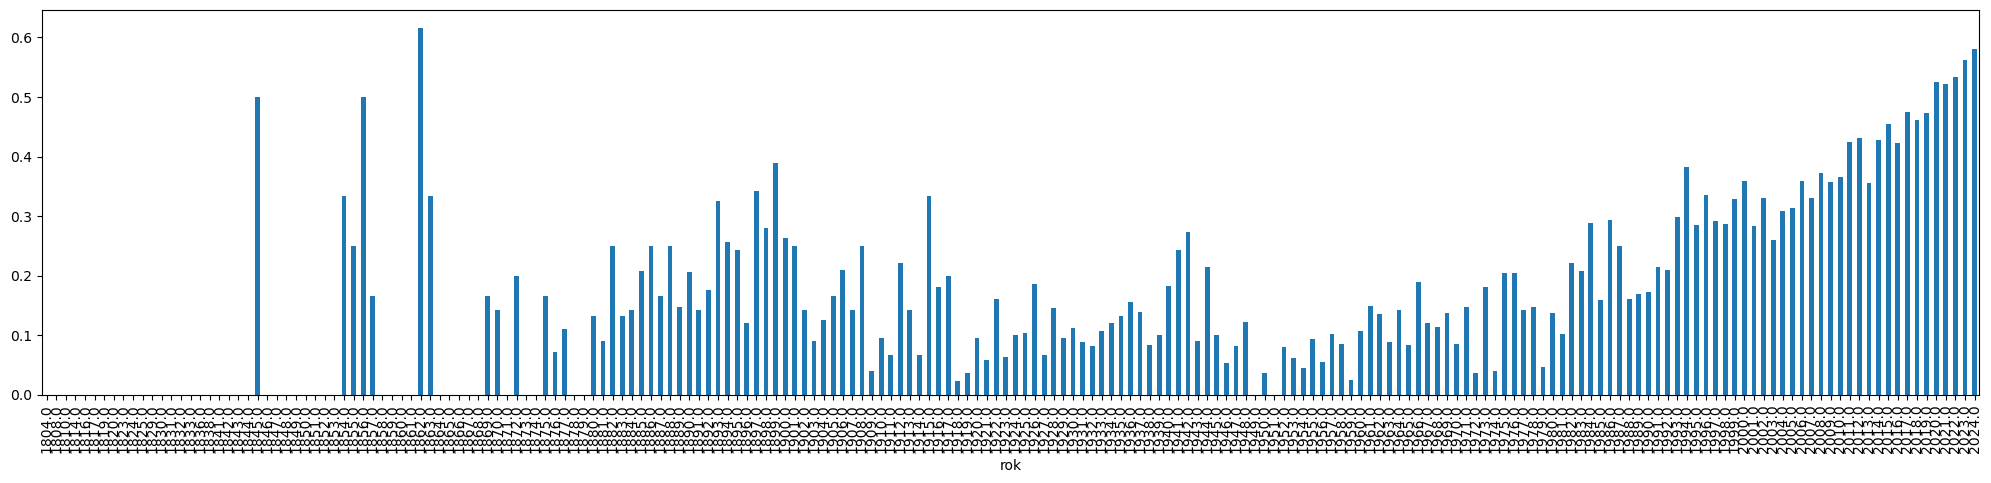

In [22]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).plot.bar(figsize=(25,5))

In [23]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).tail(10)

rok
2015.0    0.455484
2016.0    0.422902
2017.0    0.474374
2018.0    0.461446
2019.0    0.473274
2020.0    0.525196
2021.0    0.522478
2022.0    0.532875
2023.0    0.561762
2024.0    0.580762
dtype: float64

<Axes: xlabel='rok'>

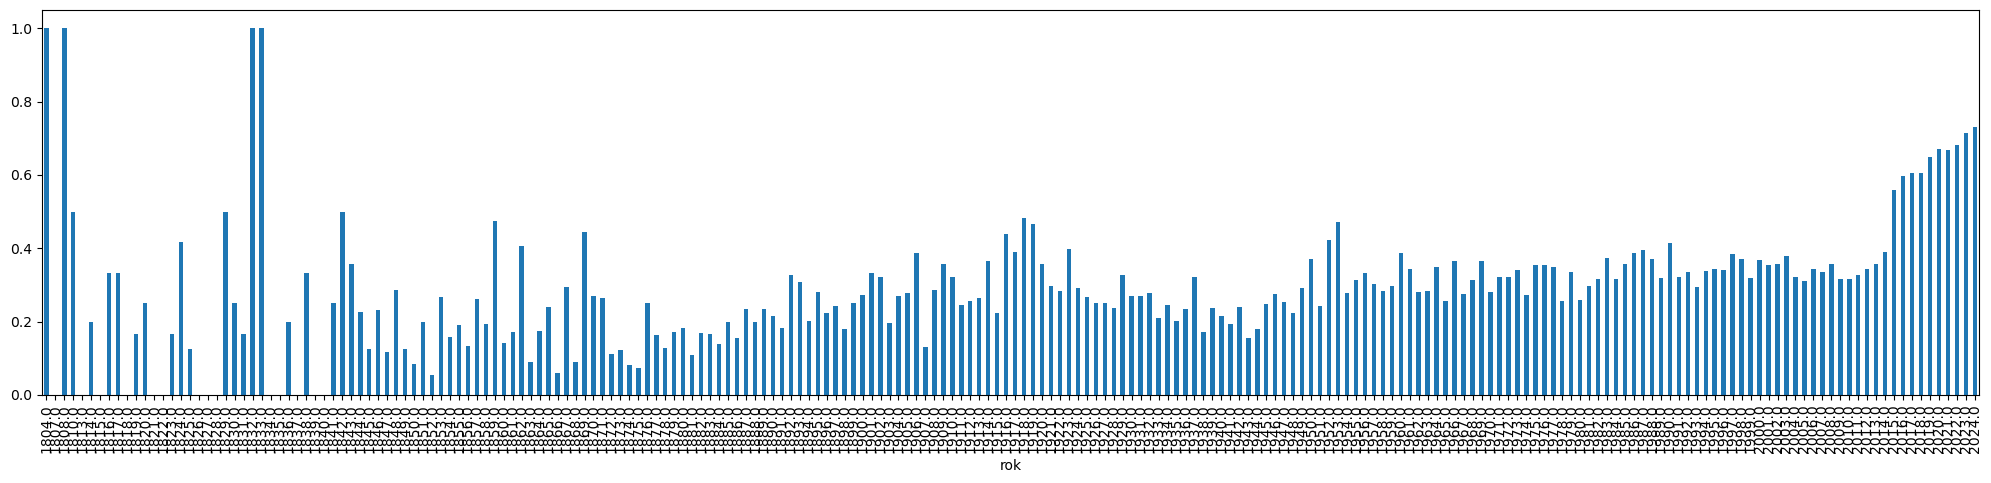

In [24]:
(df[df['gender'].isin(['m','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: ylabel='Frequency'>

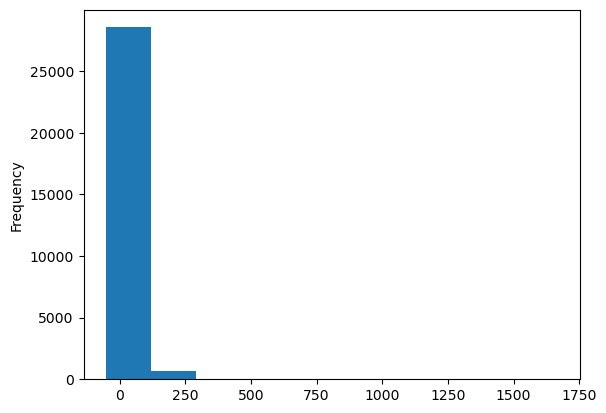

In [25]:
df[~df['gender'].isin(['ová','f'])]['vek'].plot.hist()

<Axes: ylabel='Frequency'>

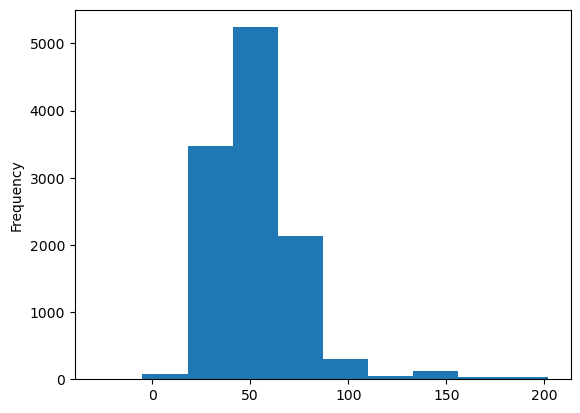

In [26]:
df[df['gender'].isin(['ová','f'])]['vek'].plot.hist()

In [89]:
len(df)

47419

In [95]:
len(df[df['narozeni'] < 1750])

101

In [87]:
df[(df['umrti'] < df['rok']) | (df['umrti'].isnull())].dropna(subset=['vek']).sort_values(by='vek',ascending=False)

C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
nkc20132447903,2013.0,"Opravdu, vstal z mrtvých!",Jan Zlatoústý,jn20011024076,None,None,[0347],[0407],[jn20011024076],"[Jan Zlatoústý,]",[asi 347-407],[0],None,None,None,None,None,None,None,None,None,None,"[Ióannés Chrýsostomos,, Johannes Chrysostomus,...","[asi 347-407, asi 347-407, asi 347-407, asi 34...",None,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]",None,None,None,None,None,None,None,None,"[Patriarcha cařihradský, církevní učitel a spi...",[http://cs.wikipedia.org/wiki/Jan_Zlato%C3%BAs...,cz a22 n 4500,347.0,407.0,1666.0,None
bknjaj05933,1835.0,Swatého Jeronyma kagjcj rozgjmánj o neyswětěgš...,Jeroným,jn19981001563,None,None,[0342],[0420],[jn19981001563],"[Jeroným,]",[asi 342-420],[0],None,None,None,[Česko],None,None,None,None,None,None,"[Gerolamo,, Hieronymus Sophronius Eusebius,, J...","[asi 342-420, asi 342-420, asi 342-420, asi 34...",None,"[0, 0, 0, 1, 0, 0, 0, 0]",None,None,None,None,None,None,None,None,"[Církevní učitel, kněz, latinský církevní spis...",None,cz a22 n 4500,342.0,420.0,1493.0,None
nkc20051306503,2006.0,Život svaté Alžběty,Štítný ze Štítného Tomáš,jn19981002480,None,None,[1333],[1409],[jn19981002480],"[Štítný ze Štítného, Tomáš,]",[asi 1333-asi 1409],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Tomáš ze Štítného,, <<ze >>Štítného, Tomáš,]","[asi 1333-asi 1409, asi 1333-asi 1409]",None,"[0, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1333 ze Štítného, zemřel 1409 v P...",None,cz a22 n 4500,1333.0,1409.0,673.0,None
nkc20152722767,2015.0,Listy z Kostnice,Hus Jan,jk01043287,"[isni, wikidata]","[0000000118834634, Q43977]",[1371],[1415],[jk01043287],"[Hus, Jan,]",[asi 1371-1415],[1],None,"[Husinec, Prachatice, Česko]","[Kostnice, Německo]",[Česko],None,"[teologie, školství, reformace, literatura, li...",None,"[teologové, vysokoškolští učitelé, kazatelé, k...",[muž],"[cze, lat]","[Jan,, M. J. H.,, Mistr Jan Hus,, Constantius,...","[asi 1371-1415, asi 1371-1415, asi 1371-1415, ...","[None, None, None, Pseudonym:, None, None, Non...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1371 v Husinci u Prachatic, zemře...",[https://cs.wikipedia.org/wiki/Jan_Hus],cz a22 n 4500,1371.0,1415.0,644.0,m
nkc20071750593,2007.0,Dcerka,Hus Jan,jk01043287,"[isni, wikidata]","[0000000118834634, Q43977]",[1371],[1415],[jk01043287],"[Hus, Jan,]",[asi 1371-1415],[1],None,"[Husinec, Prachatice, Česko]","[Kostnice, Německo]",[Česko],None,"[teologie, školství, reformace, literatura, li...",None,"[teologové, vysokoškolští učitelé, kazatelé, k...",[muž],"[cze, lat]","[Jan,, M. J. H.,, Mistr Jan Hus,, Constantius,...","[asi 1371-1415, asi 1371-1415, asi 1371-1415, ...","[None, None, None, Pseudonym:, None, None, Non...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen asi 1371 v Husinci u Prachatic, zemře...",[https://cs.wikipedia.org/wiki/Jan_Hus],cz a22 n 4500,1371.0,1415.0,636.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20172895241,2017.0,Jak pejsek a kočička pěstovali buřty,Bílá Viola Zoe,jo2017972267,None,None,[2009],None,[jo2017972267],"[Bílá, Viola Zoe,]",[2009-],[1],None,None,None,[Česko],"[Červený Kostelec, Česko]","[ilustrace, dětské písně]",None,None,[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 8. 12. 2009. Autorka ilustrací a pís...,None,nz a22 n 4500,2009.0,NaN,8.0,f
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[N

In [27]:
df[df['vek'] > 110].sample(200)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
np9306357,1992.0,Paňátko,Pittnerová Vlasta,jk01093291,"[isni, wikidata]","[0000000117580433, Q11914269]",[1858],[1926],[jk01093291],"[Pittnerová, Vlasta,]",[1858-1926],[1],None,"[Polná, Jihlava, Česko]","[Praha, Česko]",[Česko],None,"[literatura, překladatelství]",None,"[spisovatelky, překladatelky]",[žena],"[cze, ger]","[Weymelková, Vlasta,]",[1858-1926],[Skutečné jméno:],[1],None,None,None,None,None,None,None,None,"[Narozena 1. 1. 1858 v Polné, zemřela 8. 3. 19...",[https://cs.wikipedia.org/wiki/Vlasta_Pittnero...,cz a22 n 4500,1858.0,1926.0,134.0,f
nkc20162812052,2016.0,První Kytice národních prasáren,Obrátil Karel Jaroslav,jk01090908,"[isni, wikidata]","[0000000120211452, Q12028287]",[1866],[1945],[jk01090908],"[Obrátil, Karel Jaroslav,]",[1866-1945],[1],None,None,None,[Česko],None,None,None,None,None,None,"[K. J. O.,, ABC,, Alfa,]","[1866-1945, 1866-1945, 1866-1945]",None,"[0, 0, 0]",None,None,None,None,"[Jaroš, Karel,, Olšanský, Jaroslav,]","[Pseudonym:, Pseudonym:]","[1, 1]",None,"[Narozen 2. 11. 1866 v Hukvaldech na Moravě, z...",None,cz a22 n 4500,1866.0,1945.0,150.0,None
bk198106354,1980.0,"Ubrousku, přistroj se!",Říha Václav,jo2002159936,None,None,[1867],[1937],[jo2002159936],"[Říha, Václav,]",[1867-1937],[1],None,"[Tábor, Česko]","[Praha, Česko]",[Česko],None,"[literární tvorba, literární kritika, divadeln...",None,"[knihovníci, literární vědci, vysokoškolští uč...",[muž],[cze],"[Říha-Tille, Václav,]",[1867-1937],[Pseudonym:],[1],None,None,None,None,"[Junius,, Kerry,, Záruba, Tomáš,, Tille, Václav,]","[Pseudonym:, Pseudonym:, Pseudonym:, Skutečné ...","[0, 0, 1, 1]",None,"[Narozen 16. 2. 1867 v Táboře, zemřel 26. 6. 1...",None,cz a22 n 4500,1867.0,1937.0,113.0,m
bk195702478,1957.0,Pražské povídky a romány,Světlá Karolina,jk01121895,None,None,[1830],[1899],[jk01121895],"[Světlá, Karolina,]",[1830-1899],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Mužáková, Johanna,, Rottová, Johanna,]","[1830-1899, 1830-1899]","[Jméno získané sňatkem:, Skutečné jméno:]","[1, 1]",None,None,None,None,None,None,None,None,"[Narozena 24. 2. 1830 v Praze, zemřela 7. 9. 1...",None,cz a22 n 4500,1830.0,1899.0,127.0,None
nos190106268,1918.0,Padesátka z mé tobolky,Čelakovský František Ladislav,jk01021208,"[isni, wikidata]","[000000008122433X, Q545818]",[1799],[1852],[jk01021208],"[Čelakovský, František Ladislav,]",[1799-1852],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Czelakowski, F. Wł.,, Gruberová, Žofie,, Hrom...","[1799-1852, 1799-1852, 1799-1852, 1799-1852, 1...","[None, Pseudonym:, Pseudonym:, Pseudonym:, Pse...","[1, 1, 1, 1, 1, 1]",None,None,None,None,None,None,None,None,"[Narozen 7.3.1799 ve Strakonicích, zemřel 5.8....",None,cz a22 n 4500,1799.0,1852.0,119.0,None
ck8806086,1988.0,Matyáš Sandorf,Verne Jules,jn19990008769,None,None,[1828],[1905],[jn19990008769],"[Verne, Jules,]",[1828-1905],[1],None,None,None,None,None,None,None,None,None,None,"[Vern, Žjul',]",[1828-1905],None,[1],None,None,None,None,None,None,None,None,"[Francouzský romanopisec a dramatik, zakladate...",None,cz a22 n 4500,1828.0,1905.0,160.0,None
nkc20061647073,2006.0,Sabina,Kazbunda Karel,jk01053334,"[isni, wikidata]","[0000000108969324, Q12028311]",[1888],[1982],[jk01053334],"[Kazbunda, Karel,]",[1888-1982],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 24. 1. 1888 v Jičíně, zemřel 7. 6. 19...",[http://cs.wikipedia.org/wiki/Karel_Kazbunda],cz a22 n 4500,1888.0,1982.0,118.0,None
nkc20223475894,2022.0,"Rytíři, draci a poutníci",Štorm Břetislav,jk01131503,None,None,[1907],[1960],[jk01131503],"[Štorm, Břetislav,]",[1907-1960],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,

<Axes: xlabel='vek'>

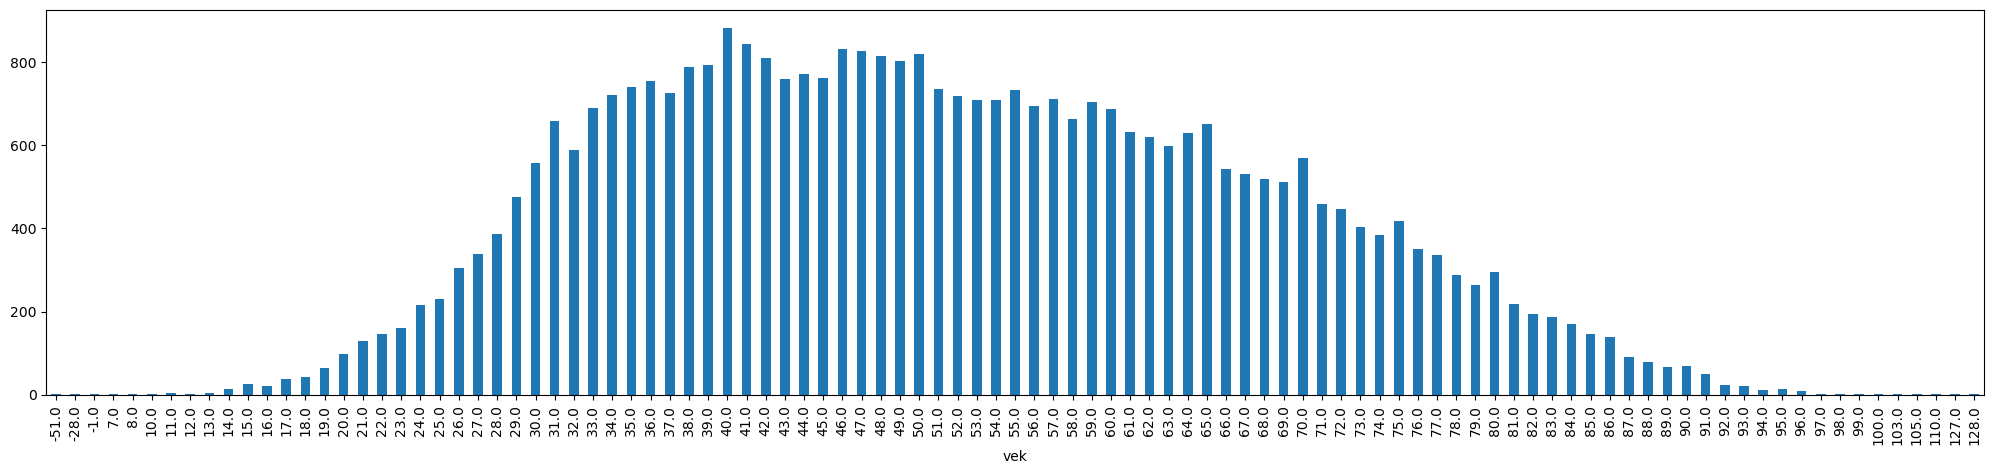

In [28]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].groupby('vek').size().plot.bar(figsize=(25,5))

In [29]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]['vek'].median()

50.0

<Axes: xlabel='vek'>

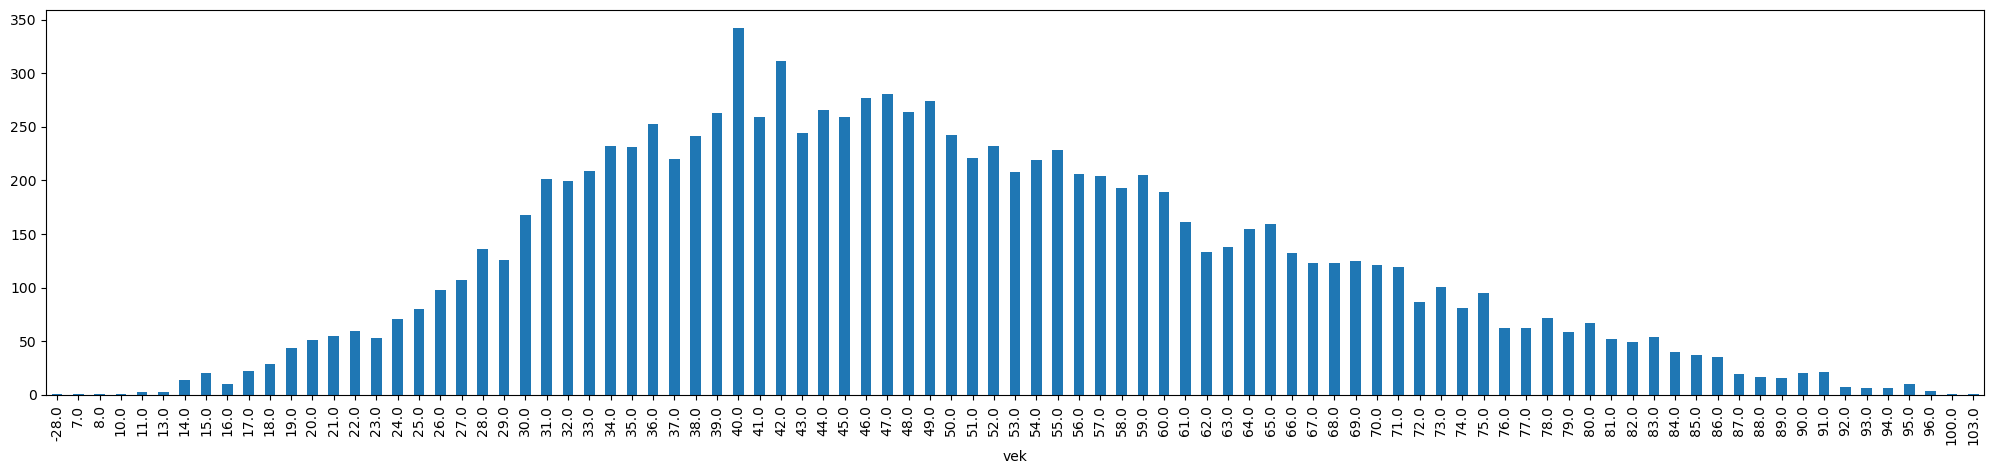

In [30]:
df[((df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())) & (df['gender'].isin(['f','ová'])) ].groupby('vek').size().plot.bar(figsize=(25,5))

In [31]:
df.sort_values(by='vek').head(30)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
bknjms02100,1889.0,Z přírody,Doubek František,jk01022862,None,None,[1940],[2011],[jk01022862],"[Doubek, František,]",[1940-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 21. 4. 1940 v Milevsku, zemřel 11. 12...",None,cz a22 n 4500,1940.0,2011.0,-51.0,None
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,None,None,[1956],None,[mzk2005274887],"[Sedláčková, Anna,]",[1956-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 1956. Ing., knihovnice, autorka bibl...",None,nz a22 n 4500,1956.0,NaN,-28.0,ová
cpk20000529314,1875.0,Mařenka,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,1876.0,1937.0,-1.0,None
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a legend.],None,nz a22 n 4500,1948.0,NaN,-1.0,None
cpk20000529316,1875.0,Tři stužky,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,1876.0,1937.0,-1.0,None
bkneli06814,1900.0,Vyvrženci,Prager Josef,jk01100877,None,None,[1893],None,[jk01100877],"[Prager, Josef,]",[1893-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 1.9.1893 v Praze. Strojník, prozaik, ...",None,nz a22 n 4500,1893.0,NaN,7.0,None
nkc20071748366,2007.0,"Pohádky postaviček, které chtějí poznat svět",Pelikánová Ester,jx20071106019,None,None,[2000],None,[jx20071106019],"[Pelikánová, Ester,]",[2000-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 6. 11. 2000 v Turnově. dětská autork...,None,cz a22 n 4500,2000.0,NaN,7.0,ová
nkc20172895241,2017.0,Jak pejsek a kočička pěstovali buřty,Bílá Viola Zoe,jo2017972267,None,None,[2009],None,[jo2017972267],"[Bílá, Viola Zoe,]",[2009-],[1],None,None,None,[Česko],"[Červený Kostelec, Česko]","[ilustrace, dětské písně]",None,None,[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 8. 12. 2009. Autorka ilustrací a pís...,None,nz a22 n 4500,2009.0,NaN,8.0,f
nkc20051580412,2005.0,Povídáme si s přírodou,Šmerda Jakub,mzk2005309121,None,None,[1995],None,[mzk2005309121],"[Šmerda, Jakub,]",[1995-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 1995 v Lysicích. Povídky dětského aut...,None,nz a22 n 4500,1995.0,NaN,10.0,None
nkc20081823565,2008.0,Chaloupka mezi lesy,Sobotková Anna,mzk2008479487,None,None,[1998],None,[mzk2008479487],"[Sobotková, Anna,]",[1998-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 1998. Autorka ilustrací pohádek a př...,None,nz a22 n 4500,1998.0,NaN,10.0,ová


In [32]:
df.groupby('autorstvo')['autorstvo_kod'].nunique().nlargest()

autorstvo
Svoboda Jiří         5
Černý Karel          5
Fiala Václav         4
Novotný František    4
Novák Jaroslav       4
Name: autorstvo_kod, dtype: int64

In [34]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].sample(50)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,narozeni,umrti,vek,gender
nkc20183027258,2018.0,"Vendulka a princ, aneb, O neporazitelnosti sta...",Just Jiří,jn99240000398,None,None,[1941],None,[jn99240000398],"[Just, Jiří,]",[1941-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 22.2.1941 v Praze. Ing., scénárista, ...",None,nz a22 n 4500,1941.0,NaN,77.0,None
cpk20041302960,2003.0,Soudničky od stříbrných hor a jiné příběhy,Lukáš Jiří,mzk2004221772,None,None,[1934],None,[mzk2004221772],"[Lukáš, Jiří,]",[1934-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 1934 v Příbrami. Regionální publicist...,None,nz a22 n 4500,1934.0,NaN,69.0,None
nkc20152664177,2015.0,Jak jsem měl ZOO,Juhaňák Stanislav J.,xx0190052,None,None,[1965],None,[xx0190052],"[Juhaňák, Stanislav J.,]",[1965-],[1],None,None,None,[Česko],None,None,None,None,None,None,"[Juhaňák, Stanislav,]",[1965-],None,[1],None,None,None,None,"[Staso,]",None,[0],None,"[Narozen 15. 11. 1965 v Kroměříži. MUDr., nakl...",None,cz a22 n 4500,1965.0,NaN,50.0,None
bk193003909,1930.0,Jiskrák,Vlasák Rudolf,jk01150058,None,None,[1888],[1938],[jk01150058],"[Vlasák, Rudolf,]",[1888-1938],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 18.6.1888 v Praze, zemřel 4.6.1938 v ...",None,cz a22 n 4500,1888.0,1938.0,42.0,None
nkc20081791505,1884.0,Lidé směšní a ubozí,Stroupežnický Ladislav,jk01121504,None,None,[1850],[1892],[jk01121504],"[Stroupežnický, Ladislav,]",[1850-1892],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 6.1.1850 v Cerhonicích u Písku, zemře...",None,nz a22 n 4500,1850.0,1892.0,34.0,None
nkc20223445401,2022.0,Člověk jménem Rour,Vaculík Ondřej,jo2002159913,None,None,[1954],None,[jo2002159913],"[Vaculík, Ondřej,]",[1954-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30.6.1954. Stavař, fejetonista.]",None,nz a22 n 4500,1954.0,NaN,68.0,None
nkc20051571394,2005.0,Setkání s --,Tobiáš Jiří,jn20010601434,None,None,[1926],[2011],[jn20010601434],"[Tobiáš, Jiří,]",[1926-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 2. 5. 1926 v Bystřici (okr. Jičín), z...",None,cz a22 n 4500,1926.0,2011.0,79.0,None
cpk19980362912,1998.0,"Park, aneb, Příběhy ze smíchovského Bronxu",Olmer Vít,jk01091068,"[isni, wikidata]","[0000000078865777, Q2536199]",[1942],None,[jk01091068],"[Olmer, Vít,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[herectví, filmová režie, filmová scenáristika]",None,"[herci, režiséři, scenáristé]",[muž],None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 19. 6. 1942 v Praze. Herec, režisér, ...",None,cz a22 n 4500,1942.0,NaN,56.0,m
nkc20233526604,2023.0,Sherlock Holmes & Poslední oběť Jacka Rozparovače,Macek Petr,mzk2004223509,None,None,[1981],None,[mzk2004223509],"[Macek, Petr,]",[1981-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Peterson, Mackenzie,]",[Pseudonym:],[1],None,"[Narozen 23. 4. 1981 v Praze. Spisovatel, scén...",[http://cs.wikipedia.org/wiki/Petr_Macek],cz a22 n 4500,1981.0,NaN,42.0,None
nkc20172958009,2017.0,Koncekraj,Mortenová Lenka,mzk2018976459,None,None,[1990],None,[mzk2018976459],"[Mortenová, Lenka,]",[1990-],[1],None,None,None,[Česko],None,"[literární tvorba, blogy, malířství]",None,"[spisovatelky, blogerky, malířky]",[žena],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 26. 1. 1990. 